Library Imports

In [109]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt  

Carregando a imagem

In [130]:
obj_img = cv2.imread('1.jpg')

Transformando para HSV

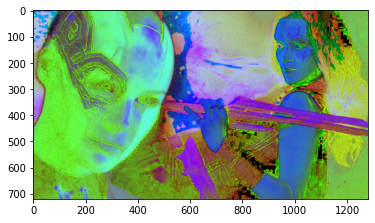

In [131]:
im = cv2.cvtColor(obj_img, cv2.COLOR_BGR2HSV)
plt.imshow(im)
plt.show()

Aplicando máscara nos personagens 

In [132]:
# range de cores para aplicação da máscara 
lower_blue  = np.array([70, 40, 40])
upper_blue  = np.array([105, 255, 255])

Máscara para o primeiro personagem

In [133]:
im = cv2.cvtColor(obj_img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(im, lower_blue, upper_blue)
cv2.imshow('mask',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

Fazendo operação bitwise da imagem original com a máscara para pegarmos apenas a cor do primeiro personagem

In [134]:
np_img = cv2.bitwise_and(obj_img,obj_img,mask=mask)
cv2.imshow('mask',np_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image_masked = cv2.bitwise_and(obj_img, mask)


Aplicando a máscara para o segundo personagem 

In [115]:
# Escolhendo um range de cores para aplicação da máscara 
lower_green  = np.array([25, 50, 50])
upper_green  = np.array([80, 255, 255])

Máscara para o segundo personagem 

In [116]:
im = cv2.cvtColor(obj_img, cv2.COLOR_BGR2HSV)
mask2= cv2.inRange(im, lower_green, upper_green)
cv2.imshow('mask',mask2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Fazendo operação bitwise da imagem original com a máscara para pegarmos apenas a cor do segundo personagem

In [120]:
np_img = cv2.bitwise_and(obj_img,obj_img,mask=mask2)
cv2.imshow('mask',np_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Somar as duas mascaras 


In [121]:
mask_sum  = cv2.bitwise_or(mask,mask2)
cv2.imshow('mask',mask_sum)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicando operação bitwise da duas máscaras somandas juntamente com a imagem original para pegarmos apenas os personagens com suas respectivas cores sem o fundo 

In [122]:
img_mask = cv2.bitwise_and(obj_img,obj_img,mask=mask_sum)
cv2.imshow('mask',img_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


Separando os canais 

In [123]:
b,g,r=cv2.split(img_mask)

In [124]:
final_img = cv2.merge([g,b,r])

Imagem sem fundo com personagens com cores invertidas 

In [125]:
cv2.imshow('mask',final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Fazer a mascara inversa dos personagens para obtermos apenas o fundo em destaque

In [126]:
mask_inv = 255 - mask_sum

In [127]:
cv2.imshow('mask',mask_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

Pegando apenas a imagem com o fundo em destaque com suas respectivas cores 

In [128]:
np_img = cv2.bitwise_and(obj_img,obj_img,mask=mask_inv)
cv2.imshow('mask',np_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Adicionando as duas imagens de fundo e personagens obtidas 

In [129]:
result = cv2.add(final_img, np_img)
cv2.imshow('mask',result)
cv2.waitKey(0)
cv2.destroyAllWindows()